In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
import itertools
from matplotlib.lines import Line2D
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression
import matplotlib.style as style
from matplotlib.patches import Patch


# data_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Data/"
# plot_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Plots/"

data_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Data/"
plot_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Plots/"

pd.set_option('display.max_columns', 500)

In [2]:
#uploading data with carbon price
equity_remind=pd.read_excel(data_path+'REMIND_equity_analysis_wCP.xls')
equity_image=pd.read_excel(data_path+'IMAGE_equity_analysis_wCP.xls')

Master_wCP=pd.read_excel(data_path+'MASTERDF_equity_analysis_wCP.xls') #master datafram with all regions from IMAGE and REMIND
allmodels_7regions_wCP=pd.read_excel(data_path+'allmodels_consolited_regions_df_wCP.xls') #consolidated with REMIND regions

In [3]:
regions_rem = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA', 'World']
regions_ima = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU', 'World']
#regions_mes = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
# 'R11_MEA', 'R11_PAO', 'R11_PAS', 'USA', 'World']

regions_rem_noworld = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA']
regions_ima_noworld = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU']
#regions_mes_noworld = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
# 'R11_MEA', 'R11_PAO', 'R11_PAS',  'USA']

In [17]:
equity_remind.Scenario.unique()

array(['SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
       'SSP5-26-SPA5-V17'], dtype=object)

In [21]:
# #adding (cum_fair_share*price) - (cum_model_output*price) to the master dataframe 
# allmodels_df['CUM_BECCSXPrice_vs_fair_share_GDPXPrice'] = allmodels_df['CUM_BECCS_fair_share_by_GDPXPrice']-allmodels_df['CUM_PriceXBECCS']
# allmodels_df['CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice']= allmodels_df['CUM_BECCS_fair_share_by_CUM_POPXPrice']-allmodels_df['CUM_PriceXBECCS']

# equity_remind['CUM_BECCSXPrice_vs_fair_share_GDPXPrice']= equity_remind['CUM_BECCS_fair_share_by_GDPXPrice']-equity_remind['CUM_PriceXBECCS']
# equity_remind['CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice']= equity_remind['CUM_BECCS_fair_share_by_CUM_POPXPrice']-equity_remind['CUM_PriceXBECCS']
# equity_image['CUM_BECCSXPrice_vs_fair_share_GDPXPrice']= equity_image['CUM_BECCS_fair_share_by_GDPXPrice']-equity_image['CUM_PriceXBECCS']
# equity_image['CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice']= equity_image['CUM_BECCS_fair_share_by_CUM_POPXPrice']-equity_image['CUM_PriceXBECCS']


# #allmodels_df[allmodels_df['CUM_CDRXPrice_vs_CUM_fair_share_GDPXPrice'].isnull()] #NaN values for World region, so it's ok

# Transfer tables & bar graphs

In [19]:
# #(fair share)-(model output) -> if positive, income generated 
# # sum of all excess income from every 10 year step
# ###need to exclude World!!?
# print(equity_image[['CDR_model_vs_FairShareXCarbonPrice_by_POP']].sum())
# print(equity_image[['CDR_model_vs_FairShareXCarbonPrice_by_GDP']].sum())

# print(equity_remind[['CDR_model_vs_FairShareXCarbonPrice_by_POP']].sum())
# print(equity_remind[['CDR_model_vs_FairShareXCarbonPrice_by_GDP']].sum())


In [8]:
#this function basically sums up the 2100 cumulative difference between CUM_CDR according to model
# and fair share CUM_POP according to equity calculation (if difference is POSITIVE)

def total_excess_BECCSXPrice_by_CUM_POP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_CDRXPrice_by_CUM_POP = equity_df.loc[excdrfilt_POP,'CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'].sum()
    return(tot_exs_CDRXPrice_by_CUM_POP)



In [9]:
def total_excess_BECCSXPrice_by_GDP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCSXPrice_vs_fair_share_GDPXPrice>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_CDRXPrice_by_CUM_GDP = equity_df.loc[excdrfilt_POP,'CUM_BECCSXPrice_vs_fair_share_GDPXPrice'].sum()
    return(tot_exs_CDRXPrice_by_CUM_GDP)



In [10]:
#CUM_BECCSXPrice already done 
#there's no one carbon price for the world so no 'CUM_BECCSXPrice' calculated
#instead this is done by adding up all 'CUM_BECCSXPrice' from each region for 2100

def total_world_CUM_BECCSXPrice(equity_df, scenario, year):
    scen = scenario
    sfilt = (equity_df.Scenario == scen)
    rfilt = (equity_df.Region != 'World')
    yfilt = (equity_df.Year == year)
    
    total_world_CUM_BECCSXPrice = equity_df.loc[sfilt&rfilt&yfilt, 'CUM_PriceXBECCS'].sum()
    #total_world_CUM_CDRXPrice = equity_df.loc[sfilt&rfilt&yfilt][['Year','Region','CUM_PriceXTotalCDR']]
   
    return (total_world_CUM_BECCSXPrice)

#total_world_CUM_CDRXPrice(equity_image, 'SSP1-19-SPA0-V17', 2100)
#total_world_CUM_CDRXPrice(equity_image, 'SSP1-19-SPA0-V17', 2100)['CUM_PriceXTotalCDR'].sum()



In [30]:
equity_image[['CUM_BECCS_fair_share_by_GDPXPrice','CUM_BECCS_fair_share_by_CUM_POPXPrice',
              'CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice','CUM_BECCSXPrice_vs_fair_share_GDPXPrice',
              'CUM_PriceXBECCS']]

,CUM_BECCS_fair_share_by_GDPXPrice,CUM_BECCS_fair_share_by_CUM_POPXPrice,CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice,CUM_BECCSXPrice_vs_fair_share_GDPXPrice,CUM_PriceXBECCS
0,0.0,2.655717e+08,2.655717e+08,-0.58,0.58
1,0.0,1.021666e+11,1.021666e+11,-54.38,54.38
2,0.0,5.108519e+11,5.108519e+11,-221.55,221.55
3,0.0,1.248234e+12,1.248234e+12,-496.78,496.78
4,0.0,2.258867e+12,2.258867e+12,-828.66,828.66
...,...,...,...,...,...
481,0.0,0.000000e+00,0.000000e+00,0.00,0.00
482,0.0,0.000000e+00,0.000000e+00,0.00,0.00
483,0.0,0.000000e+00,0.000000e+00,0.00,0.00
484,0.0,0.000000e+00,0.000000e+00,0.00,0.00


# Transfer table cumulative until 2100 - BECCS only (not total CDR)

In [13]:
#this is how much money that will be trasnferred worldwide

def create_transfer_table_2100(equity_df):
    scens=equity_df.Scenario.unique()
    transfer_df=pd.DataFrame(columns=['Model','Scenario','BECCSXPrice Transfer by 2100: AP',
                                      'BECCSXPrice Transfer by 2100: CPCE','BECCSXPrice World Total 2100',
                                      'Unit'])  
    #transfer_df['Unit']='billion US$2005'
    transfer_df['Scenario']=scens
    transfer_df['Model']=equity_df['MODEL']
    
    for i in np.arange(0,len(scens)):
        transfer_df.loc[i,'Unit']='trillion US$2005'
        transfer_df.loc[i,'BECCSXPrice Transfer by 2100: AP']=total_excess_BECCSXPrice_by_GDP(equity_df, scens[i])*10**-3
        transfer_df.loc[i,'BECCSXPrice Transfer by 2100: CPCE']=total_excess_BECCSXPrice_by_CUM_POP(equity_df, scens[i])*10**-3
        transfer_df.loc[i,'BECCSXPrice World Total 2100']=total_world_CUM_BECCSXPrice(equity_df, scens[i], 2100)*10**-3
        
    return transfer_df

transfer_image=create_transfer_table_2100(equity_image)
transfer_remind=create_transfer_table_2100(equity_remind)
transfer_totals_2100=pd.concat([transfer_image,transfer_remind])
transfer_totals_2100


,Model,Scenario,BECCSXPrice Transfer by 2100: AP,BECCSXPrice Transfer by 2100: CPCE,BECCSXPrice World Total 2100,Unit
0,IMAGE,SSP1-19-SPA0-V17,56.5979,42.1453,142.382,trillion US$2005
1,IMAGE,SSP2-LF-SPA2-V17,317.474,281.596,807.714,trillion US$2005
0,REMIND,SSP1-26-SPA1-V17,182.171,215.944,477.3,trillion US$2005
1,REMIND,SSP2-26-SPA2-V17,545.177,602.33,1532.77,trillion US$2005
2,REMIND,SSP5-19-SPA5-V17,151.442,177.343,411.827,trillion US$2005
3,REMIND,SSP5-26-SPA5-V17,1276.73,1488.67,3544.22,trillion US$2005


In [74]:
# #fraction makes sense?? ---> YES
# test_transfer_image=create_transfer_table(equity_image)
# test_transfer_image['Total_2100_world_CDRXPrice']-test_transfer_image['Total_transfers:by_GDP']
# test_transfer_image['Total_transfers:by_GDP']/test_transfer_image['Total_2100_world_CDRXPrice']

In [18]:
transfer_totals_2100.loc[:,'% transferred by 2100: AP'
                        ] = transfer_totals_2100.loc[:,'BECCSXPrice Transfer by 2100: AP'
                                                    ] / transfer_totals_2100.loc[:,'BECCSXPrice World Total 2100'] *100
transfer_totals_2100.loc[:,'% transferred by 2100: CPCE'] = transfer_totals_2100.loc[:,'BECCSXPrice Transfer by 2100: CPCE'] / transfer_totals_2100.loc[:,'BECCSXPrice World Total 2100'] *100


In [19]:
transfer_totals_2100[['BECCSXPrice Transfer by 2100: AP','BECCSXPrice Transfer by 2100: CPCE','BECCSXPrice World Total 2100',
  '% transferred by 2100: AP','% transferred by 2100: CPCE']] = transfer_totals_2100[['BECCSXPrice Transfer by 2100: AP',
                                                                                      'BECCSXPrice Transfer by 2100: CPCE',
                                                                                      'BECCSXPrice World Total 2100','% transferred by 2100: AP',
                                                                                      '% transferred by 2100: CPCE']].astype(float).round(2)
transfer_totals_2100

,Model,Scenario,BECCSXPrice Transfer by 2100: AP,BECCSXPrice Transfer by 2100: CPCE,BECCSXPrice World Total 2100,Unit,% transferred by 2100: AP,% transferred by 2100: CPCE
0,IMAGE,SSP1-19-SPA0-V17,56.60,42.15,142.38,trillion US$2005,39.75,29.60
1,IMAGE,SSP2-LF-SPA2-V17,317.47,281.60,807.71,trillion US$2005,39.31,34.86
0,REMIND,SSP1-26-SPA1-V17,182.17,215.94,477.30,trillion US$2005,38.17,45.24
1,REMIND,SSP2-26-SPA2-V17,545.18,602.33,1532.77,trillion US$2005,35.57,39.30
2,REMIND,SSP5-19-SPA5-V17,151.44,177.34,411.83,trillion US$2005,36.77,43.06
3,REMIND,SSP5-26-SPA5-V17,1276.73,1488.67,3544.22,trillion US$2005,36.02,42.00


In [23]:
scen_order = ['SSP1-19-SPA0-V17', #1.5 no/limited overshoot
              'SSP2-LF-SPA2-V17', 'SSP5-19-SPA5-V17', #1.5 overshoot
              'SSP1-26-SPA1-V17','SSP2-26-SPA2-V17', 'SSP5-26-SPA5-V17'] #2.0 compatible
transfer_totals_2100=transfer_totals_2100.set_index("Scenario").loc[scen_order].reset_index()
transfer_totals_2100

,Scenario,Model,BECCSXPrice Transfer by 2100: AP,BECCSXPrice Transfer by 2100: CPCE,BECCSXPrice World Total 2100,Unit,% transferred by 2100: AP,% transferred by 2100: CPCE
0,SSP1-19-SPA0-V17,IMAGE,56.60,42.15,142.38,trillion US$2005,39.75,29.60
1,SSP2-LF-SPA2-V17,IMAGE,317.47,281.60,807.71,trillion US$2005,39.31,34.86
2,SSP5-19-SPA5-V17,REMIND,151.44,177.34,411.83,trillion US$2005,36.77,43.06
3,SSP1-26-SPA1-V17,REMIND,182.17,215.94,477.30,trillion US$2005,38.17,45.24
4,SSP2-26-SPA2-V17,REMIND,545.18,602.33,1532.77,trillion US$2005,35.57,39.30
5,SSP5-26-SPA5-V17,REMIND,1276.73,1488.67,3544.22,trillion US$2005,36.02,42.00


In [24]:
transfer_totals_2100.to_excel(data_path+'transfer_table_2100.xls')

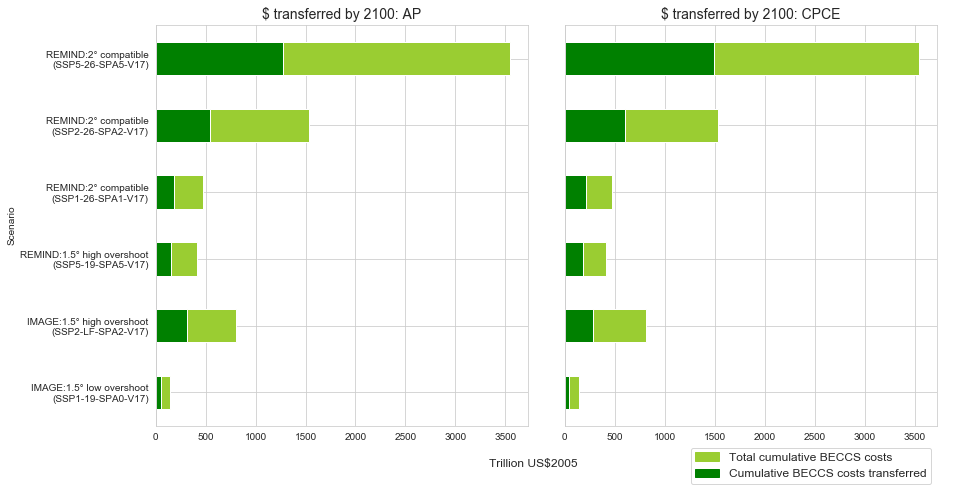

In [37]:
# table_forplot.drop(['percentage_tranfers'])
sns.set_style('whitegrid')

transfer_totals_2100['BECCSXPrice not transferred by 2100: AP'] = transfer_totals_2100[
    'BECCSXPrice World Total 2100'] - transfer_totals_2100['BECCSXPrice Transfer by 2100: AP']
transfer_totals_2100['BECCSXPrice not transferred by 2100: CPCE'] = transfer_totals_2100[
    'BECCSXPrice World Total 2100'] - transfer_totals_2100['BECCSXPrice Transfer by 2100: CPCE']

columns_GDP = ['Scenario','Model','BECCSXPrice Transfer by 2100: AP','BECCSXPrice not transferred by 2100: AP']
columns_CUM_POP = ['Scenario','Model','BECCSXPrice Transfer by 2100: CPCE','BECCSXPrice not transferred by 2100: CPCE']

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharey=True)
plt.subplots_adjust(top=0.92, wspace=0.1, hspace = 0.12)
#plt.suptitle('BECCSXPrice transferred by 2100', fontsize = 14)

df_forplot=transfer_totals_2100.loc[:,(columns_GDP)]
df_forplot2=transfer_totals_2100.loc[:,(columns_CUM_POP)]
#ax1=plt.bar(x='Scenario', data=df_forplot, stacked=True, ax=axes[0]).set_title('$ tranferred: by GDP', fontsize = 11)
#plt.legend(labels=['BECCSXPrice Transferred:AP', 'BECCSXPrice World Total 2100'])
ax1=df_forplot.plot.barh(x='Scenario', stacked=True, ax=axes[0], legend=None, color=['green','yellowgreen']).set_title('$ transferred by 2100: AP', fontsize = 14)
ax2=df_forplot2.plot.barh(x='Scenario', stacked=True, ax=axes[1], legend=None, color=['green','yellowgreen']).set_title('$ transferred by 2100: CPCE', fontsize = 14)
#ax1.legend(labels=['BECCSXPrice Transferred:CPCE', 'BECCSXPrice World Total 2100'])
#fig.text(0.03, 0.5, 'trillion US$2005', fontsize=12, ha='center', va='center', rotation='vertical')
plt.ylabel(" ")
plt.yticks([0,1,2,3,4,5], ['IMAGE:1.5° low overshoot\n(SSP1-19-SPA0-V17)','IMAGE:1.5° high overshoot\n(SSP2-LF-SPA2-V17)',
                          'REMIND:1.5° high overshoot\n(SSP5-19-SPA5-V17)','REMIND:2° compatible\n(SSP1-26-SPA1-V17)',
                           'REMIND:2° compatible\n(SSP2-26-SPA2-V17)','REMIND:2° compatible\n(SSP5-26-SPA5-V17)'], 
           fontsize=12)

fig.text(0.5, 0.05, 'Trillion US$2005', fontsize=12, ha='center', va='center')

import matplotlib.patches as mpatches
lg_patch = mpatches.Patch(color='yellowgreen', label='Total cumulative BECCS costs')
g_patch = mpatches.Patch(color='green', label='Cumulative BECCS costs transferred')
plt.figlegend(handles=[lg_patch,g_patch],
              loc='lower right', bbox_to_anchor=(0.93, 0),fontsize=12)

plt.savefig(plot_path + 'cum_BECCS_costs_transfers_2100.png', bbox_inches='tight')
#GDP_bar=df_forplot.plot.bar(x='Scenario', y='Total_transfers:by_GDP')
#ax = table_forplot.plot.bar(stacked = True, order = scen_order)


#ax = df_forplot.set_index("Scenario").loc[scen_order].plot.bar(stacked = True)
#ax.xticks([0,1,2,3,4,5,6,7], ['1.5° low overshoot (IMAGE)','1.5° high overshoot (IMAGE)','RCP1.9, SSP5','RCP2.6, SSP1', 'RCP2.6, SSP2', 'RCP2.6, SSP5', 'RCP1.9, SSP1', 'LED'])


In [79]:
print(transfer_totals_2100[['% transferred by 2100: AP']].mean().round(2))
print(transfer_totals_2100[['% transferred by 2100: CPCE']].mean().round(2))

% transferred by 2100: AP    37.6
dtype: float64
% transferred by 2100: CPCE    39.01
dtype: float64


# Transfer table - 2050 (NOT USED)

In [92]:
#another one until 2050
def total_excess_BECCSXPrice_by_GDP_2050(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        if yr <= 2050:
            yrfilt=(equity_df.Year==yr)
            excdrfilt_POP=(equity_df.CUM_BECCSXPrice_vs_fair_share_GDPXPrice>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCSXPrice_by_GDP_2050 = equity_df.loc[excdrfilt_POP,'CUM_BECCSXPrice_vs_fair_share_GDPXPrice'].sum()
    return(tot_exs_BECCSXPrice_by_GDP_2050)

def total_excess_BECCSXPrice_by_CUM_POP_2050(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        if yr <= 2050:
            yrfilt=(equity_df.Year==yr)
            excdrfilt_POP=(equity_df.CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCSXPrice_by_CUM_POP_2050 = equity_df.loc[excdrfilt_POP,'CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'].sum()
    return(tot_exs_BECCSXPrice_by_CUM_POP_2050)

# def total_world_CUM_BECCSXPrice(equity_df, scenario, year):
#     scen = scenario
#     sfilt = (equity_df.Scenario == scen)
#     rfilt = (equity_df.Region != 'World')
#     yfilt = (equity_df.Year == year)
    
#     total_world_CUM_CDRXPrice = equity_df.loc[sfilt&rfilt&yfilt, 'CUM_PriceXTotalCDR'].sum()
#     #total_world_CUM_CDRXPrice = equity_df.loc[sfilt&rfilt&yfilt][['Year','Region','CUM_PriceXTotalCDR']]
   
#     return (total_world_CUM_CDRXPrice)


In [93]:
#allmodels_df.head(10)

def create_transfer_table_2050(equity_df):
    scens=equity_df.Scenario.unique()
    transfer_df=pd.DataFrame(columns=['Model','Scenario','BECCSXPrice Transfer by 2050: AP',
                                      'BECCSXPrice Transfer by 2050: CPCE','BECCSXPrice World Total 2050',
                                      'Unit'])  
    #transfer_df['Unit']='billion US$2005'
    transfer_df['Scenario']=scens
    transfer_df['Model']=equity_df['MODEL']
    
    for i in np.arange(0,len(scens)):
        transfer_df.loc[i,'Unit']='trillion US$2005'
        transfer_df.loc[i,'BECCSXPrice Transfer by 2050: AP']=total_excess_BECCSXPrice_by_GDP_2050(equity_df, scens[i])*10**-3
        transfer_df.loc[i,'BECCSXPrice Transfer by 2050: CPCE']=total_excess_BECCSXPrice_by_CUM_POP_2050(equity_df, scens[i])*10**-3
        transfer_df.loc[i,'BECCSXPrice World Total 2050']=total_world_CUM_BECCSXPrice(equity_df, scens[i], 2050)*10**-3
        
    return transfer_df

transfer_image_2050=create_transfer_table_2050(equity_image)
transfer_remind_2050=create_transfer_table_2050(equity_remind)
transfer_totals_2050=pd.concat([transfer_image_2050,transfer_remind_2050])

transfer_totals_2050.loc[:,'% transferred by 2050: AP'] = transfer_totals_2050.loc[:,'BECCSXPrice Transfer by 2050: AP'] / transfer_totals_2050.loc[:,'BECCSXPrice World Total 2050'] *100
transfer_totals_2050.loc[:,'% transferred by 2050: CPCE'] = transfer_totals_2050.loc[:,'BECCSXPrice Transfer by 2050: CPCE'] / transfer_totals_2050.loc[:,'BECCSXPrice World Total 2050'] *100

transfer_totals_2050[['BECCSXPrice Transfer by 2050: AP','BECCSXPrice Transfer by 2050: CPCE',
                      'BECCSXPrice World Total 2050','% transferred by 2050: AP',
                      '% transferred by 2050: CPCE']] = transfer_totals_2050[['BECCSXPrice Transfer by 2050: AP',
                                                                              'BECCSXPrice Transfer by 2050: CPCE',
                                                                              'BECCSXPrice World Total 2050',
                                                                              '% transferred by 2050: AP',
                                                                              '% transferred by 2050: CPCE']].astype(float).round(2)
transfer_totals_2050

,Model,Scenario,BECCSXPrice Transfer by 2050: AP,BECCSXPrice Transfer by 2050: CPCE,BECCSXPrice World Total 2050,Unit,% transferred by 2050: AP,% transferred by 2050: CPCE
0,IMAGE,SSP1-19-SPA0-V17,12.13,8.96,29.18,trillion US$2005,41.58,30.71
1,IMAGE,SSP2-LF-SPA2-V17,58.05,40.21,124.80,trillion US$2005,46.52,32.22
0,REMIND,SSP1-26-SPA1-V17,1.54,1.63,3.04,trillion US$2005,50.82,53.81
1,REMIND,SSP2-26-SPA2-V17,5.65,7.50,15.80,trillion US$2005,35.74,47.48
2,REMIND,SSP5-19-SPA5-V17,3.38,4.09,9.54,trillion US$2005,35.42,42.85
3,REMIND,SSP5-26-SPA5-V17,16.28,17.00,35.88,trillion US$2005,45.36,47.38


In [94]:
transfer_totals_2050.to_excel(data_path+'transfer_table_2050.xls')

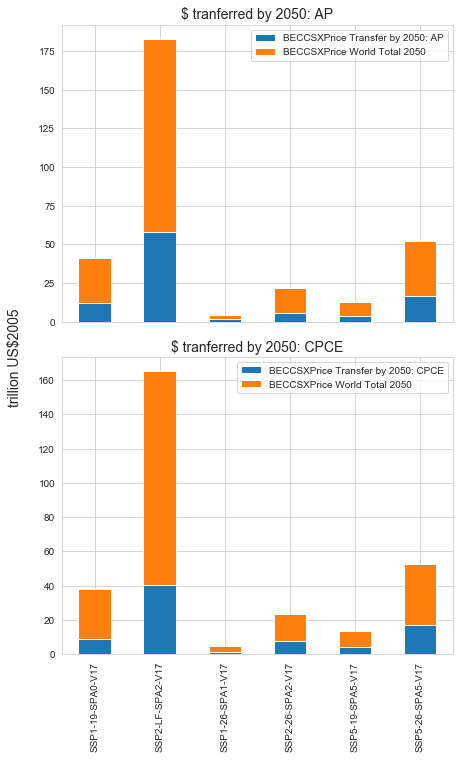

In [285]:
# 2050 BECCSXPrice transfer barplot
scen_order = ['SSP1-19-SPA0-V17', #1.5 no/limited overshoot
              'SSP2-LF-SPA2-V17', 'SSP5-19-SPA5-V17', #1.5 overshoot
              'SSP2-26-SPA2-V17', 'SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2.0 compatible
columns_GDP_2050 = ['Scenario','Model','BECCSXPrice Transfer by 2050: AP','BECCSXPrice World Total 2050']
columns_CUM_POP_2050 = ['Scenario','Model','BECCSXPrice Transfer by 2050: CPCE','BECCSXPrice World Total 2050']

fig, axes = plt.subplots(2, 1, figsize=(7,11), sharex=True)
plt.subplots_adjust(top=0.92, wspace=0.1, hspace = 0.12)
#plt.suptitle('BECCSXPrice transferred by 2100', fontsize = 14)

df_forplot=transfer_totals_2050.loc[:,(columns_GDP_2050)]
df_forplot2=transfer_totals_2050.loc[:,(columns_CUM_POP_2050)]
#ax1=plt.bar(x='Scenario', data=df_forplot, stacked=True, ax=axes[0]).set_title('$ tranferred: by GDP', fontsize = 11)
ax1=df_forplot.plot.bar(x='Scenario', stacked=True, ax=axes[0]).set_title('$ tranferred by 2050: AP', fontsize = 14)
ax2=df_forplot2.plot.bar(x='Scenario', stacked=True, ax=axes[1]).set_title('$ tranferred by 2050: CPCE', fontsize = 14)
fig.text(0.03, 0.5, 'trillion US$2005', fontsize=14, ha='center', va='center', rotation='vertical')
#plt.tick_params(labelsize=13)
#plt.setp(ax.get_xticklabels(), size=13)
plt.xlabel(" ")
plt.savefig(plot_path + 'cum_transfers_2050.png', bbox_inches='tight')

#ax = df_forplot.set_index("Scenario").loc[scen_order].plot.bar(stacked = True)
#ax.xticks([0,1,2,3,4,5,6,7], ['RCP1.9, SSP1','RCP1.9, SSP2','RCP1.9, SSP5','RCP2.6, SSP1', 'RCP2.6, SSP2', 'RCP2.6, SSP5', 'RCP1.9, SSP1', 'LED'])

In [99]:
print(transfer_totals_2050[['% transferred by 2050: AP']].mean().round(2))
print(transfer_totals_2050[['% transferred by 2050: CPCE']].mean().round(2))

% transferred by 2050: AP    42.57
dtype: float64
% transferred by 2050: CPCE    42.41
dtype: float64


# BECCS x Price box plots
### one for model output, one for AP + GDP projection, one for CPCE + CUM EM projections, including negative values for those who are not deemed responsible
Master_wCP #master datafram with all regions from IMAGE and REMIND
allmodels_7regions_wCP #consolidated with REMIND regions

In [290]:
allmodels_7regions_wCP['Population']

0       996.700000
1      1181.000000
2      1351.000000
3      1488.000000
4      1589.000000
          ...     
427     577.663589
428     573.175682
429     565.630310
430     555.396126
431     541.123901
Name: Population, Length: 432, dtype: float64

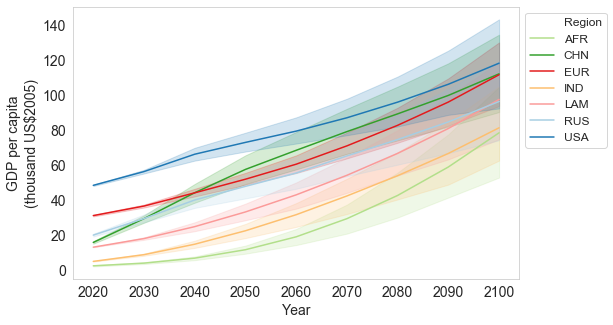

In [293]:
# Conceptual Figure - GDP 
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
regions=['AFR','CHN','EUR','IND','LAM', 'RUS','USA']

df_GDP = allmodels_7regions_wCP[(allmodels_7regions_wCP.Region.isin(regions))].copy()

#df_GDP['GDP_cap_thousand'] = df_GDP.loc[:,'GDP_cap']*(10**-3)#USD Million 
df_GDP['GDP_cap_thousand'] = df_GDP.loc[:,'GDP']/df_GDP.loc[:,'Population']*(10**-3)


f,ax=plt.subplots(figsize=(8,5))
ax = sns.lineplot(x='Year',y='GDP_cap_thousand',data=df_GDP, hue='Region', palette=colour_palette, ax=ax)
ax.grid(False)
#ax.set_title('GDP per Region', fontsize = 18)
ax.set_ylabel('GDP per capita\n(thousand US$2005)', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.legend(loc="upper left", bbox_to_anchor =(1,1), fontsize=12)
ax.tick_params(labelsize=14)
plt.savefig(plot_path + 'Fig - GDP_per_cap.png', bbox_inches="tight")

In [122]:
allmodels_7regions_wCP['CUM_CO2_per_cap_INCL_CDR'] = allmodels_7regions_wCP['CUM_CO2'] / allmodels_7regions_wCP['cumPopulation']
#CO2_emissions = 'Total_GHG'+'TOTAL_CDR': total GHG - CDR (negative values)
#'CUM_CO2' = cumulative GHG emissions

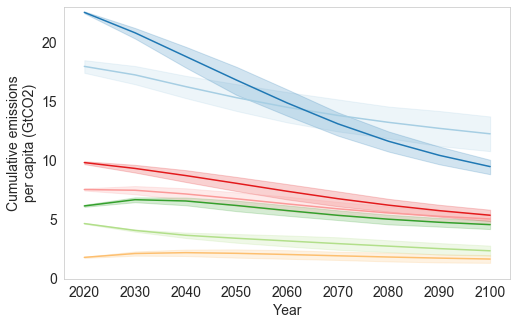

In [255]:
# Conceptual Figure - Cum emissions per cap 
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
regions=['AFR','CHN','EUR','IND','LAM', 'RUS','USA']
# regions=['USA','EUR','CHN','RUS', 'LAM']
variable = 'CUM_CO2_per_cap_INCL_CDR'

df_cum_em = allmodels_7regions_wCP[(allmodels_7regions_wCP.Region.isin(regions))].copy()

f,ax=plt.subplots(figsize=(8,5))
ax = sns.lineplot(x='Year',y=variable,data=df_cum_em ,hue='Region',palette=colour_palette, ax=ax)
ax.set(ylim=(0, 23))
ax.set_ylabel('Cumulative emissions\nper capita (GtCO2)', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.tick_params(labelsize=14)
ax.grid(False)
#ax.set_title('Cumulative Emissions per Capita', fontsize = 18)
ax.legend_.remove()
#ax.legend(loc='upper right', ncol=2)

plt.savefig(plot_path + 'Concept-Cum_em.png')

In [3]:
#the same -> fair share = 0 so (BECCS fair share - model output) is always (-model output)
allmodels_7regions_wCP.loc[(allmodels_7regions_wCP.Region==("EUR")) & (allmodels_7regions_wCP.Year==(2100))
                          ][['CUM_PriceXBECCS','CUM_BECCSXPrice_vs_fair_share_GDPXPrice', 'CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice']]

,CUM_PriceXBECCS,CUM_BECCSXPrice_vs_fair_share_GDPXPrice,CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice
26,39495.509050,49705.893860,22725.851520
98,97777.751680,198059.765777,104164.489752
170,25607.973150,60028.112425,17708.465264
242,229526.724725,515553.471824,212853.888168
422,20817.293236,3840.311966,-4238.956615
431,72515.637877,74769.377943,24443.021980


In [8]:
#variables: CUM_BECCS_fair_share_by_GDP, CUM_BECCS_fair_share_by_CUM_POP, CUM_BECCS
allmodels_7regions_wCP

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_CO2,Total_GHG,BECCS,LANDCDR,TOTAL_CDR,CO2_Emissions,CUM_CO2,CUM_CDR,CUM_BECCS,Unit_CO2,BECCS_Investments,CUM_BECCS_Investments,Unit_Investment,Carbon_Price,Population,GDP,Unit_Population,cumPopulation,2016_emissions,em_change,PriceXTotalCDR,Unit_PriceXTotalCDR,PriceXBECCS,Unit_PriceXBECCS,Unit_GDP,GDP_cap,GDP_cap_avg,GDP_cap_CoI_nan,GDP_cap_CoI,GDP_CoI_nan,GDP_CoI,GDP_CoI_frac,CDR_fair_share_by_GDP,BECCS_fair_share_by_GDP,BECCS_fair_share_by_GDPXPrice,BECCS_investments_by_GDP,CUM_CDR_fair_share_by_GDP,CUM_BECCS_fair_share_by_GDP,CUM_BECCS_investments_by_GDP,CUM_PriceXBECCS,CUM_BECCS_fair_share_by_GDPXPrice,Global_CUM_CO2_by_CUM_POP,Fair_share_by_CUM_POP,Excess_emissions_by_CUM_POP,Exc_em_fac_by_CUM_POP,CDR_fair_share_by_CUM_POP,CUM_CDR_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,CUM_CDR_model_vs_fair_share_by_CUM_POP,CUM_CDR_model_vs_fair_share_by_GDP,BECCS_fair_share_by_CUM_POP,CUM_BECCS_fair_share_by_CUM_POP,BECCS_Investments_by_POP,CUM_BECCS_Investments_by_POP,BECCS_fair_share_by_CUM_POPXPrice,BECCS_model_vs_FairShareXPrice_by_GDP,BECCS_model_vs_FairShareXPrice_by_POP,CUM_BECCS_fair_share_by_CUM_POPXPrice,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_GDP,CUM_BECCS_model_vs_fair_share_by_CUM_POP,CUM_BECCS_model_vs_fair_share_by_GDP,BECCSXPrice_vs_fair_share_CUM_POPXPrice,BECCSXPrice_vs_fair_share_GDPXPrice,CUM_BECCSXPrice_vs_fair_share_GDPXPrice,CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice
0,0,REMIND,AFR,SSP1-26-SPA1-V17,2020,1228.005700,3233.000000,0.006000,119.686100,119.692100,3352.692100,98032.189961,119.692100,0.006000,Mt/yr,0.001300,0.001300,billion US$2005/yr,1.000000,996.700000,2.288000e+06,Mio,21023.288404,3127.643169,1.071955,0.119692,billion_US$2005/yr,0.000006,billion_US$2005/yr,USD Million,2295.575399,13416.412568,NaN,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.000000,6.796055,142875.427434,-44843.237473,NaN,0.000000,0.000000,-119.692100,-119.692100,-119.692100,-119.692100,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,-0.006000,-0.006000,-0.006000,-0.006000,-0.000006,-0.000006,-0.000006,-0.000006
1,1,REMIND,AFR,SSP1-26-SPA1-V17,2030,1370.014800,3367.000000,4.024000,24.840000,28.864000,3395.864000,131774.970461,862.472600,20.156000,Mt/yr,0.000000,0.007800,billion US$2005/yr,84.220000,1181.000000,4.454000e+06,Mio,31911.788404,3127.643169,1.085758,2.430926,billion_US$2005/yr,0.338901,billion_US$2005/yr,USD Million,3771.380186,18943.170489,NaN,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.694536,0.000000,6.593814,210420.388889,-78645.418427,NaN,0.000000,0.000000,-28.864000,-28.864000,-862.472600,-862.472600,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,-4.024000,-4.024000,-20.156000,-20.156000,-0.338901,-0.338901,-1.694536,-1.694536
2,2,REMIND,AFR,SSP1-26-SPA1-V17,2040,1893.305100,4358.000000,50.300000,7.435500,57.735500,4415.735500,170832.967961,1295.470100,291.776000,Mt/yr,0.000000,0.007800,billion US$2005/yr,137.200000,1351.000000,9.177000e+06,Mio,44571.788404,3127.643169,1.411841,7.921311,billion_US$2005/yr,6.901160,billion_US$2005/yr,USD Million,6792.746114,26243.259437,NaN,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.894843,0.000000,6.257034,278887.176629,-108054.208668,NaN,0.000000,0.000000,-57.735500,-57.735500,-1295.470100,-1295.470100,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,-50.300000,-50.300000,-291.776000,-291.776000,-6.901160,-6.901160,-37.894843,-37.894843
3,3,REMIND,AFR,SSP1-26-SPA1-V17,2050,1848.322400,4731.000000,282.500000,20.049700,302.549700,5033.549700,218079.393961,3096.896100,1955.776000,Mt/yr,0.000100,0.008300,billion US$2005/yr,223.500000,1488.000000,1.791000e+07,Mio,58766.788404,3127.643169,1.609375,67.619858,billion_US$2005/yr,63.138750,billion_US$2005/yr,USD Million,120

In [4]:
#prepare df for boxplots

boxplot_df_1 = allmodels_7regions_wCP.melt(id_vars=['MODEL', 'Scenario', 'Region', 'Year'], 
                                         value_vars=['Total_CO2', 'BECCS', 'CUM_BECCS',
                                                     'LANDCDR','CUM_BECCS_fair_share_by_GDP', 
                                                     'CUM_BECCS_fair_share_by_CUM_POP',
       'TOTAL_CDR', 'CO2_Emissions', 'CUM_CO2', 'CUM_CDR', 'Unit_CO2',
       'Population', 'GDP', 'Unit_Population', 'cumPopulation', 'Unit_GDP',
       'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP', 'BECCS_fair_share_by_GDPXPrice','CUM_BECCS_fair_share_by_GDPXPrice',
        'BECCS_fair_share_by_CUM_POPXPrice','CUM_BECCS_fair_share_by_CUM_POPXPrice', 
        'PriceXBECCS','CUM_PriceXBECCS', 
        'BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_GDPXPrice',
        'BECCSXPrice_vs_fair_share_CUM_POPXPrice', 'CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice',                                                
#         'CDR_fair_share_by_CUM_POP',
#        'CUM_CDR_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_CUM_POP',
#        'CDR_model_vs_fair_share_by_GDP',
#        'CUM_CDR_model_vs_fair_share_by_CUM_POP',
#        'CUM_CDR_model_vs_fair_share_by_GDP',
        'BECCS_Investments','CUM_BECCS_Investments',
        'BECCS_Investments_by_POP','CUM_BECCS_Investments_by_POP',
        'BECCS_investments_by_GDP','CUM_BECCS_investments_by_GDP']).reset_index()


/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


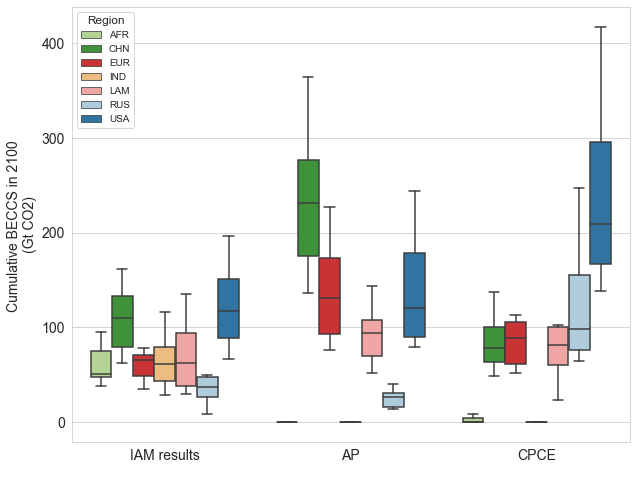

In [5]:
#boxplot1 - cum BECCS and fair shares of cum BECCS by 2100
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
variab = ['CUM_BECCS', 'CUM_BECCS_fair_share_by_GDP', 'CUM_BECCS_fair_share_by_CUM_POP']

boxp_2100 = boxplot_df_1.loc[(boxplot_df_1.Region.isin(reg)) &
                            (boxplot_df_1.Year==(2100)) &
                            (boxplot_df_1.variable.isin(variab))]
boxp_2100['value']=boxp_2100['value'].astype(float)*10**-3
plt.figure(figsize=(10,8))
box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region', 
    palette=colour_palette,
    order=['CUM_BECCS', 'CUM_BECCS_fair_share_by_GDP', 'CUM_BECCS_fair_share_by_CUM_POP'],
    showfliers=False)

box2100.set(ylabel="Cumulative BECCS in 2100 \n(Gt CO2)",xlabel = " ")
box2100.set(xticklabels=['IAM results','AP','CPCE'])
box2100.tick_params(labelsize=14)
#box2100.legend(loc='upper right')
#box2100.set_ylim([-200,500])
plt.savefig(plot_path + 'BECCS_regional_differences_2100.png',bbox_inches="tight")

/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(-200, 500)

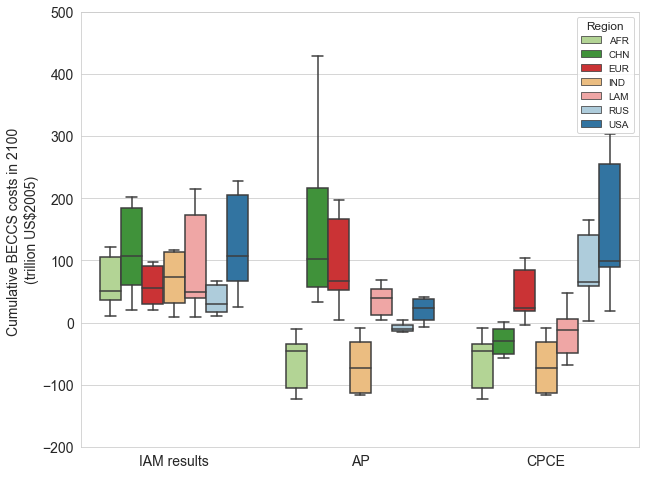

In [42]:
#Box plot 2 - cumulative differences in BECCSXPrice by 2100 
scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17']

sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
variab = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice']

boxp_2100 = boxplot_df_1.loc[(boxplot_df_1.Region.isin(reg)) &
                            (boxplot_df_1.Year==(2100)) &
                            (boxplot_df_1.variable.isin(variab))]
boxp_2100['value']=boxp_2100['value'].astype(float)*10**-3
plt.figure(figsize=(10,8))
box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region', 
    palette=colour_palette,
    order=['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'],
    showfliers=False)


# boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
# boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
# boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]

# colours_15 = ["black"]
# pal_15 = sns.xkcd_palette(colours_15)
# colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
# pal_2 = sns.xkcd_palette(colours_2)

# box1 = sns.swarmplot(x='variable', y="value", data=boxp_2, 
#                      order = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'],
#                      hue = 'Region',palette= pal_15, marker = '*', 
#                      dodge = True, s=7, alpha=0.6)
# box1 = sns.swarmplot(x='variable', y="value", data=boxp_15_ho, 
#                      hue = 'Region',order = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'],
#                      palette = pal_15, marker = 'd', dodge = True, s=6, alpha=0.6)
# box1 = sns.swarmplot(x='variable', y="value", data=boxp_15_lo,
#                      hue = 'Region',order = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'], 
#                      palette = pal_15, marker = 'o', dodge = True, s=6, alpha =0.6)

box2100.set(ylabel="Cumulative BECCS costs in 2100 \n(trillion US$2005)",xlabel = " ")
box2100.set(xticklabels=['IAM results','AP','CPCE'])
box2100.tick_params(labelsize=14)
#box2100.legend(loc='upper right')
box2100.set_ylim([-200,500])

#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
# from matplotlib.patches import Patch
# l = plt.legend(handles =  [Patch(facecolor=colours[2], edgecolor='k', label='Africa'),
#                            Patch(facecolor=colours[3], edgecolor='k', label='China'),
#                            Patch(facecolor=colours[5], edgecolor='k', label='Europe'),
#                            Patch(facecolor=colours[6], edgecolor='k', label='India'),
#                            Patch(facecolor=colours[4], edgecolor='k', label='Latin America'),
#                            Patch(facecolor=colours[0], edgecolor='k', label='Russia'),
#                            Patch(facecolor=colours[1], edgecolor='k', label='USA')], 
#                            fontsize = 11, 
#                             bbox_to_anchor =(1, 1))
# box1_legend=plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color="black", label = '1.5°C lo', alpha=0.7),
#                          Line2D([0], [0], linestyle = 'none', marker = 'd', color="black", label = '1.5°C ho'),
#                 Line2D([0], [0], linestyle = 'none', marker = '*', color="black", label = '2°C')],
#                 bbox_to_anchor =(1, 0.73), fontsize = 11)    # bbox_to_anchor =(0.28, 0.9)/0.155, 0.68 <- for left side

# plt.gca().add_artist(l)
#plt.savefig(plot_path + 'BECCSXPrice_regional_differences_2100.png',bbox_inches="tight")

In [43]:
boxp_2100.loc[boxp_2100.variable==('CUM_PriceXBECCS')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,6.0,94.147348,107.602715,9.928622,36.181420,50.060684,105.081165,299.857777
CHN,6.0,161.960387,169.783556,20.313574,60.199202,106.331279,184.714591,483.121988
EUR,6.0,80.956815,78.519439,20.817293,29.079857,56.005573,91.462223,229.526725
IND,6.0,90.925798,87.266020,9.154793,30.663932,73.402028,113.527880,246.274877
LAM,6.0,125.996553,152.257339,8.222151,39.649911,48.810526,173.275236,398.776269
RUS,6.0,47.666079,46.557102,11.037234,16.222871,29.927531,60.926433,132.190126
USA,6.0,184.669813,204.849352,25.341324,67.373602,106.386543,205.497225,577.001059


In [44]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCSXPrice_vs_fair_share_GDPXPrice')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,6.0,-92.631361,108.465197,-299.857777,-105.081165,-45.512722,-33.907439,-9.928622
CHN,6.0,160.575284,152.349233,33.052363,56.516156,102.967445,216.730428,428.780632
EUR,6.0,150.326156,190.323195,3.840312,52.286449,67.398745,167.237169,515.553472
IND,6.0,-90.925798,87.266020,-246.274877,-113.527880,-73.402028,-30.663932,-9.154793
LAM,6.0,35.359667,26.594594,3.833193,12.161016,39.163325,53.545860,68.497871
RUS,6.0,-8.191072,7.557512,-15.697802,-13.129797,-10.630542,-4.622943,4.395749
USA,6.0,49.520816,84.829612,-7.067514,3.885880,22.700743,37.413797,218.858518


In [45]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,6.0,-92.319147,108.750730,-299.857777,-105.081165,-45.490153,-33.896154,-8.100474
CHN,6.0,-54.114301,76.302471,-203.898894,-51.410246,-30.054157,-9.907047,1.041686
EUR,6.0,62.942793,82.257804,-4.238957,18.962812,23.584437,84.234123,212.853888
IND,6.0,-90.925798,87.266020,-246.274877,-113.527880,-73.402028,-30.663932,-9.154793
LAM,6.0,-15.749082,43.185057,-68.547365,-48.743672,-11.233782,4.953569,47.418055
RUS,6.0,142.321802,181.791653,2.571405,59.381297,65.705190,140.210850,497.629625
USA,6.0,225.391330,270.433330,19.170395,88.968965,99.725298,255.019425,741.559335


In [22]:
boxplot_df_1.loc[(boxplot_df_1.Region==('LAM')) & 
                 (boxplot_df_1.Year==(2100)) &
                 (boxplot_df_1.variable==('CUM_PriceXBECCS'))
                ]['value'].median()*10**-3

48.81052565660001

In [23]:
boxplot_df_1.loc[(boxplot_df_1.Region==('LAM')) & 
                 (boxplot_df_1.Year==(2100)) &
                 (boxplot_df_1.variable==('CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'))
                ]['value'].median()*10**-3

-11.23378188544777

# (NOT USED) 2050 cum BECCS X Price boxplot

/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


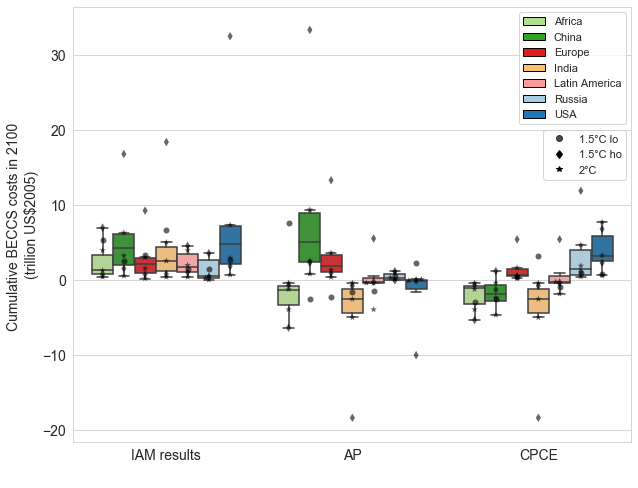

In [241]:
#Box plot 2 - cumulative differences in BECCSXPrice by 2050 
scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17']

sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
variab = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice']

boxp_2100 = boxplot_df_1.loc[(boxplot_df_1.Region.isin(reg)) &
                            (boxplot_df_1.Year==(2050)) &
                            (boxplot_df_1.variable.isin(variab))]
boxp_2100['value']=boxp_2100['value'].astype(float)*10**-3
plt.figure(figsize=(10,8))
box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region', 
    palette=colour_palette,
    order=['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'],
    showfliers=False)


boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]

colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)

box1 = sns.swarmplot(x='variable', y="value", data=boxp_2, 
                     order = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'],
                     hue = 'Region',palette= pal_15, marker = '*', 
                     dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x='variable', y="value", data=boxp_15_ho, 
                     hue = 'Region',order = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'],
                     palette = pal_15, marker = 'd', dodge = True, s=6, alpha=0.6)
box1 = sns.swarmplot(x='variable', y="value", data=boxp_15_lo,
                     hue = 'Region',order = ['CUM_PriceXBECCS', 'CUM_BECCSXPrice_vs_fair_share_GDPXPrice','CUM_BECCSXPrice_vs_fair_share_CUM_POPXPrice'], 
                     palette = pal_15, marker = 'o', dodge = True, s=6, alpha =0.6)

box2100.set(ylabel="Cumulative BECCS costs in 2050 \n(trillion US$2005)",xlabel = " ")
box2100.set(xticklabels=['IAM results','AP','CPCE'])
box2100.tick_params(labelsize=14)
#box2100.legend(loc='upper right')
#box2100.set_ylim([-250,550])

#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
from matplotlib.patches import Patch
l = plt.legend(handles =  [Patch(facecolor=colours[2], edgecolor='k', label='Africa'),
                           Patch(facecolor=colours[3], edgecolor='k', label='China'),
                           Patch(facecolor=colours[5], edgecolor='k', label='Europe'),
                           Patch(facecolor=colours[6], edgecolor='k', label='India'),
                           Patch(facecolor=colours[4], edgecolor='k', label='Latin America'),
                           Patch(facecolor=colours[0], edgecolor='k', label='Russia'),
                           Patch(facecolor=colours[1], edgecolor='k', label='USA')], 
                           fontsize = 11, 
                           bbox_to_anchor =(1, 1))
box1_legend=plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color="black", label = '1.5°C lo', alpha=0.7),
                         Line2D([0], [0], linestyle = 'none', marker = 'd', color="black", label = '1.5°C ho'),
                Line2D([0], [0], linestyle = 'none', marker = '*', color="black", label = '2°C')],
                bbox_to_anchor =(1, 0.73), fontsize = 11)    # bbox_to_anchor =(0.28, 0.9)/0.155, 0.68 <- for left side

plt.gca().add_artist(l)
#plt.savefig(plot_path + 'BECCSXPrice_regional_differences_2050.png')

# (OLD) Income generated by 2100 from equity schemes
(equity schemes: cumulative world CDR * Price)-(modelled cumulative world CDR * Price) for 2100

In [198]:
#this is to see the difference btwn (modelled cumulative world CDR * Price) and (equity schemes: cumulative world CDR * Price)

def create_income_df(equity_df, year):
    income_df=pd.DataFrame(columns=['Model','Scenario','World_cum_CDRXPrice:modelled','World_cum_CDRXCarbonPrice:by_GDP',
                                    'World_cum_CDRXCarbonPrice:by_CUM_POP', 'Unit'])  
    
    rfilt = (equity_df.Region != 'World')
    yfilt = (equity_df.Year == year)
    for model in equity_df.MODEL:
        income_df['Model']=model
        for scen in equity_df.Scenario.unique():
            sfilt = equity_df.Scenario == scen
            #income_df.loc[scen, 'Model']=equity_df.loc[sfilt&rfilt&yfilt,'MODEL']
            income_df.loc[scen, 'World_cum_CDRXPrice:modelled']= equity_df.loc[sfilt&rfilt&yfilt, 'CUM_PriceXTotalCDR'].sum()/1000000000000
            income_df.loc[scen, 'World_cum_CDRXCarbonPrice:by_GDP']= equity_df.loc[sfilt&rfilt&yfilt, 'CUM_CDR_fair_share_by_GDPXCarbonPrice'].sum()/1000000000000
            income_df.loc[scen, 'World_cum_CDRXCarbonPrice:by_CUM_POP']= equity_df.loc[sfilt&rfilt&yfilt, 'CUM_CDR_fair_share_by_CUM_POPXCarbonPrice'].sum()/1000000000000
            income_df.loc[scen, 'Unit'] = 'trillion US$2005'

    income_df['Scenario']=equity_df.Scenario.unique()
    income_df['Income_from_GDP_fair_share']=income_df['World_cum_CDRXCarbonPrice:by_GDP']-income_df['World_cum_CDRXPrice:modelled']
    income_df['Income_from_CUM_POP_fair_share']=income_df['World_cum_CDRXCarbonPrice:by_CUM_POP']-income_df['World_cum_CDRXPrice:modelled']

    #income_df['Model']=equity_df['MODEL']
    return income_df.reset_index(drop=True)

income_image_2100=create_income_df(equity_image, 2100)
income_remind_2100=create_income_df(equity_remind, 2100)
income_table_2100=pd.concat([income_image_2100, income_remind_2100])
income_table_2100

,Model,Scenario,World_cum_CDRXPrice:modelled,World_cum_CDRXCarbonPrice:by_GDP,World_cum_CDRXCarbonPrice:by_CUM_POP,Unit,Income_from_GDP_fair_share,Income_from_CUM_POP_fair_share
0,IMAGE,SSP1-19-SPA0-V17,221.589,216.681,216.681,trillion US$2005,-4.90826,-4.90826
1,IMAGE,SSP2-LF-SPA2-V17,988.253,978.752,979.423,trillion US$2005,-9.50088,-8.8303
0,REMIND,SSP1-19-SPA1-V17,9.72055,9.74529,9.74383,trillion US$2005,0.0247414,0.0232812
1,REMIND,SSP2-19-SPA2-V17,85.8835,85.9535,85.9518,trillion US$2005,0.069937,0.0682541
2,REMIND,SSP1-26-SPA1-V17,484.746,484.814,484.813,trillion US$2005,0.0684505,0.0672448
3,REMIND,SSP2-26-SPA2-V17,1540.11,1539.98,1540.32,trillion US$2005,-0.13302,0.208277
4,REMIND,SSP5-19-SPA5-V17,424.54,424.614,424.662,trillion US$2005,0.0739231,0.121538
5,REMIND,SSP5-26-SPA5-V17,3557.48,3557.38,3560.71,trillion US$2005,-0.102897,3.22706


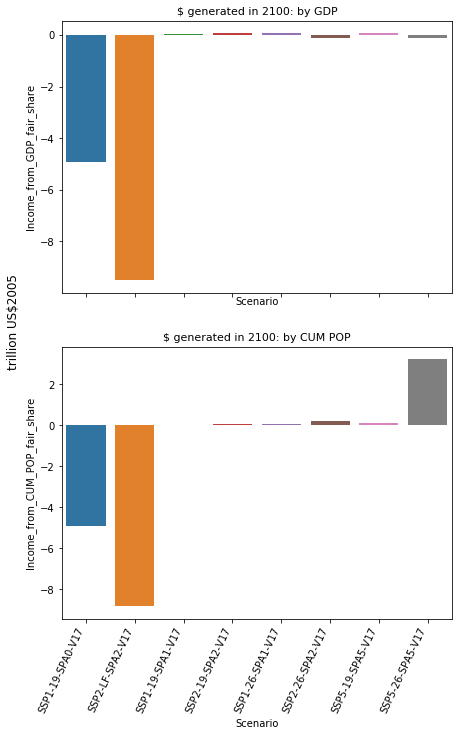

In [232]:
fig, axes = plt.subplots(2, 1, figsize=(7,11), sharex = True)
ax1=sns.barplot(x='Scenario',y='Income_from_GDP_fair_share' ,data=income_table_2100, ax=axes[0]).set_title('$ generated in 2100: by GDP', fontsize = 11)
ax2=sns.barplot(x='Scenario',y='Income_from_CUM_POP_fair_share' ,data=income_table_2100, ax=axes[1]).set_title('$ generated in 2100: by CUM POP', fontsize = 11)
plt.xticks(rotation=65, horizontalalignment='right')
fig.text(0.03, 0.5, 'trillion US$2005', fontsize=12, ha='center', va='center', rotation='vertical')
plt.savefig(plot_path + 'diff_cum_by_equity_schemes-modelled.png', bbox_inches='tight')

In [231]:
income_image_2050=create_income_df(equity_image, 2050)
income_remind_2050=create_income_df(equity_remind, 2050)
income_table_2050=pd.concat([income_image_2050, income_remind_2050])
income_table_2050

,Model,Scenario,World_cum_CDRXPrice:modelled,World_cum_CDRXCarbonPrice:by_GDP,World_cum_CDRXCarbonPrice:by_CUM_POP,Unit,Income_from_GDP_fair_share,Income_from_CUM_POP_fair_share
0,IMAGE,SSP1-19-SPA0-V17,52.2784,48.0685,48.0685,trillion US$2005,-4.20983,-4.20983
1,IMAGE,SSP2-LF-SPA2-V17,155.292,146.856,147.526,trillion US$2005,-8.43654,-7.76596
0,REMIND,SSP1-19-SPA1-V17,0.242709,0.266951,0.265491,trillion US$2005,0.024242,0.0227818
1,REMIND,SSP2-19-SPA2-V17,3.17202,3.23881,3.23198,trillion US$2005,0.0667824,0.0599609
2,REMIND,SSP1-26-SPA1-V17,3.4746,3.4921,3.4909,trillion US$2005,0.0175012,0.0162955
3,REMIND,SSP2-26-SPA2-V17,16.6448,16.6736,16.6715,trillion US$2005,0.0287797,0.0266529
4,REMIND,SSP5-19-SPA5-V17,9.81057,9.85248,9.85228,trillion US$2005,0.0419096,0.0417018
5,REMIND,SSP5-26-SPA5-V17,36.9198,36.9261,36.9423,trillion US$2005,0.00630911,0.0225505


In [285]:
# Prepare data for boxplots

boxplot_df_allmodels = allmodels_df.melt(id_vars=['MODEL', 'Region', 'Scenario', 'Year'], value_vars=['Total_CO2', 'BECCS', 'LANDCDR',
       'TOTAL_CDR', 'CO2_Emissions', 'CUM_CO2', 'CUM_CDR', 'Unit_CO2',
       'Population', 'GDP', 'Unit_Population', 'cumPopulation', 'Unit_GDP',
       'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP', 'CDR_fair_share_by_CUM_POP',
       'CUM_CDR_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_CUM_POP',
       'CDR_model_vs_fair_share_by_GDP',
       'CUM_CDR_model_vs_fair_share_by_CUM_POP',
       'CUM_CDR_model_vs_fair_share_by_GDP','CUM_BECCS_Investments','CUM_BECCS_Investments_by_POP',
       'CUM_BECCS_investments_by_GDP','CUM_PriceXTotalCDR', 'CUM_CDR_fair_share_by_GDPXCarbonPrice',
       'CUM_CDR_fair_share_by_CUM_POPXCarbonPrice']).reset_index()

#boxplot_df_allmodels

In [315]:
scen_allmodels = ['SSP1-19-SPA0-V17', #1.5 no/limited overshoot
              'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17', #1.5 overshoot
              'SSP2-26-SPA2-V17', 'SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2.0 compatible

scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_15_all= ['SSP1-19-SPA0-V17','SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] #all 1.5 scens
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] 
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[8],colours[0],colours[1],colours[2],colours[4], colours[5]]
regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050','2100']
variab = ['CUM_CDR_fair_share_by_CUM_POPXCarbonPrice', 'CUM_CDR_fair_share_by_GDPXCarbonPrice', 'CUM_PriceXTotalCDR']

boxp_all=boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_all['value'] = boxp_all['value'].astype(float)/1000000000000

/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Broccolee/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


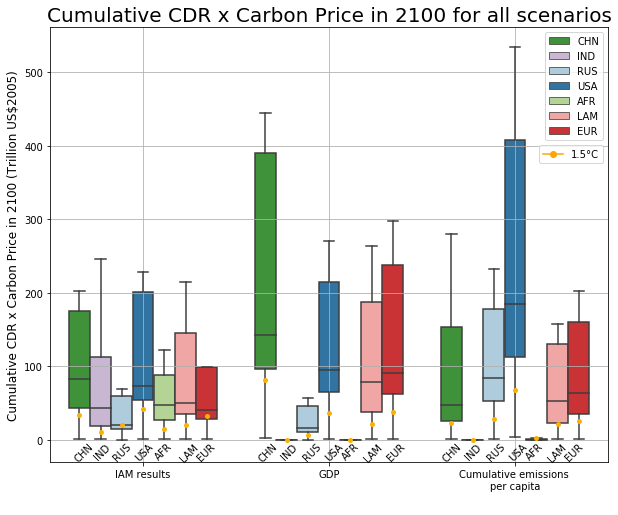

In [346]:
#figure- boxplot of all scenarios 
f, axes = plt.subplots(1, 1, figsize=(10,8))

#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6

boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000000000000

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region', 
                   hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], 
                   palette = colour_palette, showfliers=False)

box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["yellow orange"]
pal_15 = sns.xkcd_palette(colours_15)
boxp_15 = boxp_2100.loc[boxp_2100.Scenario==('SSP1-19-SPA0-V17')]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)

# colours_2 = ["bright pink"]                  # color options https://xkcd.com/color/rgb/
# pal_2 = sns.xkcd_palette(colours_2)
# boxp_2= boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
# box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', palette = pal_2, marker = '*', dodge = True)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([0], [0], marker = 'o', color="orange", label = '1.5°C')], 
                loc = 'best', bbox_to_anchor =(1.0, 0.74))
plt.gca().add_artist(l)

box1.set_title("Cumulative CDR x Carbon Price in 2100 for all scenarios", fontsize=20)
box1.set_ylabel("Cumulative CDR x Carbon Price in 2100 (Trillion US$2005)", fontsize = 12)
box1.set(xlabel = " ")
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.grid('on')

#plt.savefig(plot_path + 'BoxplotCDRXCarbonPrice_2100_allscens.png')

/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Broccolee/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


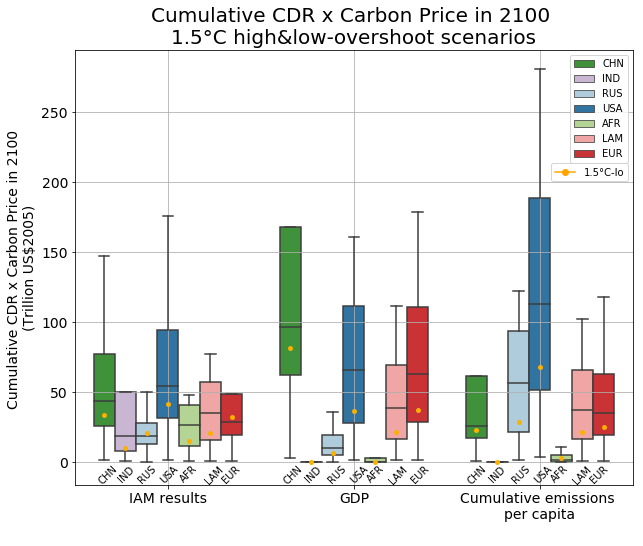

In [348]:
# Figure all 1.5°-scenarios, including low/no overshoot and high-overshoot
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_15_all)) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000000000000

sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,8))
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region', 
                   hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette, 
                   showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
#box1 = sns.stripplot(x='variable', y='value', data=boxp_2100, color="orange", jitter=0.2, size=2.5)

box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["yellow orange"]
pal_15 = sns.xkcd_palette(colours_15)
#colours_2 = ["light grey"]                  # color options https://xkcd.com/color/rgb/
#pal_2 = sns.xkcd_palette(colours_2)

boxp_15 = boxp_2100.loc[boxp_2100.Scenario==('SSP1-19-SPA0-V17')]
#boxp_2= boxp_all.loc[boxp_all.Scenario.isin(scen_2)]

box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)
#box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', palette = pal_2, marker = '*', dodge = True)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([0], [0], marker = 'o', color="orange", label = '1.5°C-lo')], 
                loc = 'best', bbox_to_anchor =(1.0, 0.75))
plt.gca().add_artist(l)

box1.set_ylabel("Cumulative CDR x Carbon Price in 2100 \n(Trillion US$2005)", fontsize = 14)
box1.set(xlabel = " ")
#box1.set(ylim =(-50,450))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR x Carbon Price in 2100 \n1.5°C high&low-overshoot scenarios", fontsize=20)
box1.tick_params(labelsize=14)
box1.grid('on')

plt.savefig(plot_path + 'BoxplotCDRXCarbonPrice_2100_15scens.png')

/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/Broccolee/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated(

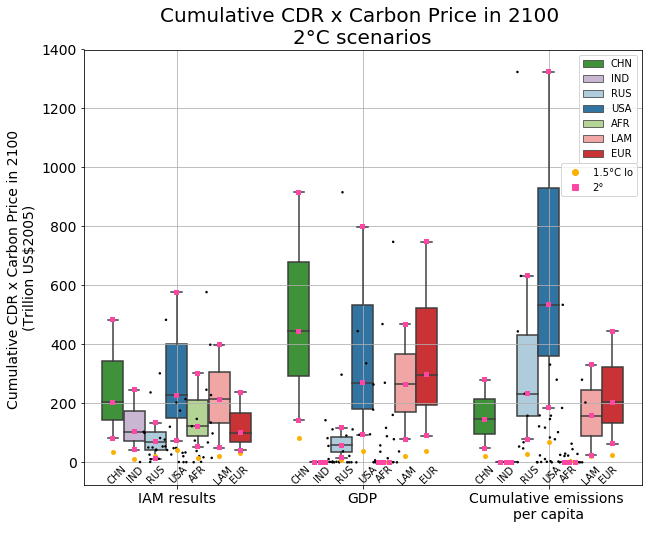

In [380]:
# Figure all 2°-scenarios
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_2)) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_all2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab)))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000000000000
boxp_all2100['value'] = boxp_all2100['value'].astype(float)/1000000000000

sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,8))
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region', 
                   hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette, 
                   showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
box1 = sns.stripplot(x='variable', y='value', data=boxp_all2100, color="black", jitter=0.2, size=2.5)

box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["yellow orange"]
pal_15 = sns.xkcd_palette(colours_15)
boxp_15 = boxp_all2100.loc[boxp_all2100.Scenario==('SSP1-19-SPA0-V17')]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)
colours_2 = ["barbie pink"]
pal_2 = sns.xkcd_palette(colours_2)
boxp_2 = boxp_all2100.loc[boxp_all2100.Scenario.isin(scen_2)]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_2, marker = 's', facecolors='none', dodge = True)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([], [], linestyle = 'none', marker = 'o', color="xkcd:yellow orange", label = '1.5°C lo'),
                         Line2D([], [], linestyle = 'none', marker = 's', color='xkcd:barbie pink', label = '2°')], 
                loc = 'best', bbox_to_anchor =(1.0, 0.75))

plt.gca().add_artist(l)

box1.set_ylabel("Cumulative CDR x Carbon Price in 2100 \n(Trillion US$2005)", fontsize = 14)
box1.set(xlabel = " ")
#box1.set(ylim =(-50,450))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR x Carbon Price in 2100 \n2°C scenarios", fontsize=20)
box1.tick_params(labelsize=14)
box1.grid('on')

plt.savefig(plot_path + 'BoxplotCDRXCarbonPrice_2100_2scens.png')

/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Broccolee/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


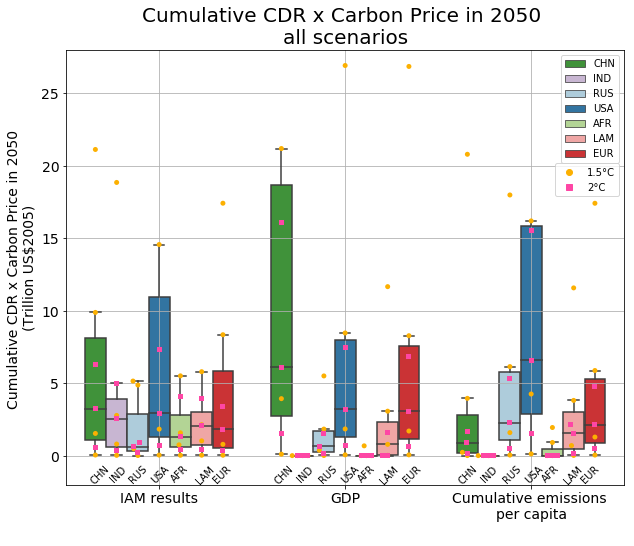

In [394]:
# Figure all scenarios up to 2050
boxp_2050 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year==(2050)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

# boxp_all2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
#                             (boxplot_df_allmodels.Scenario.isin(scen_allmodels) &
#                             (boxplot_df_allmodels.Year==(2100)) &
#                             (boxplot_df_allmodels.variable.isin(variab)))]

boxp_2050['value'] = boxp_2050['value'].astype(float)/1000000000000 #trillion US$2005
#boxp_all2100['value'] = boxp_all2100['value'].astype(float)/1000000000000

sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,8))
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x="variable", y="value", data=boxp_2050, hue = 'Region', 
                   hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette, 
                   showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
#box1 = sns.stripplot(x='variable', y='value', data=boxp_all2100, color="black", jitter=0.2, size=2.5)

box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["yellow orange"]
pal_15 = sns.xkcd_palette(colours_15)
boxp_15 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15_all)]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)
colours_2 = ["barbie pink"]
pal_2 = sns.xkcd_palette(colours_2)
boxp_2 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_2)]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_2, marker = 's', facecolors='none', dodge = True)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([], [], linestyle = 'none', marker = 'o', color="xkcd:yellow orange", label = '1.5°C'),
                         Line2D([], [], linestyle = 'none', marker = 's', color='xkcd:barbie pink', label = '2°C')], 
                loc = 'best', bbox_to_anchor =(1.0, 0.75))

plt.gca().add_artist(l)

box1.set_ylabel("Cumulative CDR x Carbon Price in 2050 \n(Trillion US$2005)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-2,28))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR x Carbon Price in 2050 \nall scenarios", fontsize=20)
box1.tick_params(labelsize=14)
box1.grid('on')

plt.savefig(plot_path + 'BoxplotCDRXCarbonPrice_2050_allscens.png')

In [347]:
#add a column with mean/median values?
boxp_2= boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)].copy()
for scen in boxp_2.Scenario.unique():
    sfilt= boxp_2.Scenario==scen
    for reg in boxp_2.Region.unique():
        rfilt=boxp_2.Region==reg
        for var in boxp_2.variable.unique(): 
            boxp_2['mean_value'] = boxp_2.loc[sfilt&rfilt&(boxp_2.variable==(var))]['value'].mean()

boxp_2['mean_value'] = boxp_2.loc[(boxp_2.variable==]['value'].mean()

#boxp_2


SyntaxError: invalid syntax (<ipython-input-347-255093d58145>, line 10)

In [381]:
boxp_2100.head(10)

,index,MODEL,Region,Scenario,Year,variable,value
42344,42344,REMIND,AFR,SSP1-26-SPA1-V17,2100,CUM_PriceXTotalCDR,53.573623
42353,42353,REMIND,CHN,SSP1-26-SPA1-V17,2100,CUM_PriceXTotalCDR,82.445176
42362,42362,REMIND,EUR,SSP1-26-SPA1-V17,2100,CUM_PriceXTotalCDR,41.121984
42371,42371,REMIND,IND,SSP1-26-SPA1-V17,2100,CUM_PriceXTotalCDR,43.290540
42389,42389,REMIND,LAM,SSP1-26-SPA1-V17,2100,CUM_PriceXTotalCDR,48.964597
42425,42425,REMIND,RUS,SSP1-26-SPA1-V17,2100,CUM_PriceXTotalCDR,11.894527
42434,42434,REMIND,USA,SSP1-26-SPA1-V17,2100,CUM_PriceXTotalCDR,73.718296
42452,42452,REMIND,AFR,SSP2-26-SPA2-V17,2100,CUM_PriceXTotalCDR,122.446220
42461,42461,REMIND,CHN,SSP2-26-SPA2-V17,2100,CUM_PriceXTotalCDR,203.026326
42470,42470,REMIND,EUR,SSP2-26-SPA2-V17,2100,CUM_PriceXTotalCDR,99.703598


In [129]:
box_df_all = pd.DataFrame()
box_df_all = allmodels_df[['Region', 'Scenario', 'Year', 'CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']]

regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050', '2100']
scen_allmodels = ['SSP1-19-SPA0-V17', 
 'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17',
 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
 'SSP5-26-SPA5-V17', 'LowEnergyDemand', 'SSP1-19']

box_df_all = box_df_all.loc[(box_df_all['Region'].isin(regions)) & (box_df_all['Year'].isin(years)) 
                            & (box_df_all['Scenario'].isin(scen_allmodels))]

box_df_all = box_df_all.rename(columns={'CUM_CDR_fair_share_by_CUM_POP': 'CDR_per_cap_method', 'CUM_CDR_fair_share_by_GDP': 'CDR_GDP_method', 'CUM_CDR': 'IAM_output'})
box_df_all = box_df_all.reset_index(drop = True)

In [85]:
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, 'median_cap'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'CDR_per_cap_method'])
        
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, 'median_GDP'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'CDR_GDP_method'])
        
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, 'median_IAM'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'IAM_output'])

In [86]:
print(box_df_all)

    Region          Scenario    Year  CDR_per_cap_method  CDR_GDP_method  \
0      CHN  SSP1-19-SPA0-V17  2050.0            11554.69        52513.86   
1      CHN  SSP1-19-SPA0-V17  2100.0            90614.56       256088.32   
2      IND  SSP1-19-SPA0-V17  2050.0                0.00            0.00   
3      IND  SSP1-19-SPA0-V17  2100.0                0.00            0.00   
4      RUS  SSP1-19-SPA0-V17  2050.0            15808.68         4602.77   
5      RUS  SSP1-19-SPA0-V17  2100.0            95578.61        20930.99   
6      USA  SSP1-19-SPA0-V17  2050.0            39848.56        21519.13   
7      USA  SSP1-19-SPA0-V17  2100.0           205987.24       123752.08   
8      CHN  SSP2-LF-SPA2-V17  2050.0            27058.20        70128.18   
9      CHN  SSP2-LF-SPA2-V17  2100.0           168306.24       338614.71   
10     IND  SSP2-LF-SPA2-V17  2050.0                0.00            0.00   
11     IND  SSP2-LF-SPA2-V17  2100.0                0.00            0.00   
12     RUS  

In [87]:
china = box_df_all.loc[(box_df_all.Region == 'CHN') & (box_df_all.Year == 2050), 'CDR_per_cap_method']
print(np.median(china))

usa = box_df_all.loc[(box_df_all.Region == 'USA') & (box_df_all.Year == 2050), 'CDR_per_cap_method']
print(np.median(usa))

russia = box_df_all.loc[(box_df_all.Region == 'RUS') & (box_df_all.Year == 2050), 'CDR_per_cap_method']
print(np.median(russia))

africa = box_df_all.loc[(box_df_all.Region == 'AFR') & (box_df_all.Year == 2050), 'CDR_per_cap_method']
print(np.median(africa))

3760.48
41659.2
16001.16
0.0
